# 一. 线性回归在分类上存在的问题

1. 线性回归的条件

&emsp;&emsp;在上述例子中，我们看到线性回归可以做预测，也可以做分类，一切结果看起来都是很完美。     
&emsp;&emsp;线性回归模型：     
&emsp;&emsp;       
&emsp;&emsp;$y^{(i)}=x^{(i)}W + b^{(i)} + \epsilon^{(i)}$      
&emsp;&emsp;     
&emsp;&emsp;其中$\epsilon^{(i)}$的推导建立在一个假设之上：服从正态分布（Gaussian Distribution）      
&emsp;&emsp;    
&emsp;&emsp;$p(x)=\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(x-\mu)^2}{2\sigma^2})$&emsp;&emsp;&emsp;&emsp;其中：μ表示期望（均数），σ表示标准差，σ2表示方差     
&emsp;&emsp;     
&emsp;&emsp;记正态分布为$N(μ，σ)$ ，标准正态分布是$N( 0，1 )$       
&emsp;&emsp;       
&emsp;&emsp;下面可视化正态分布：      

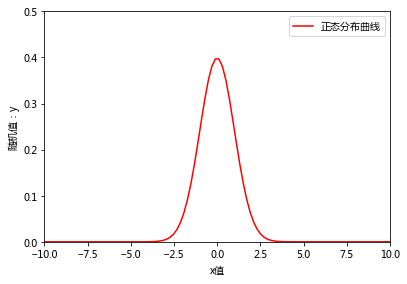

In [120]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#  绘图的坐标轴
figure=plt.figure('正态分布可视化', figsize=(6, 4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='正态分布函数曲线')
ax.set_xlabel('x值')
ax.set_ylabel('随机值：y')

# 设置绘制曲线范围
ax.set_xlim(left=-10,right=10)    # x取值范围
ax.set_ylim(bottom=0, top=0.5)    # 概率在[0, 1) 之间

# x取值范围
x=np.linspace( -10 ,10, 100,  dtype=np.float32 )

# 系数-方差
sigma=1
# 系数-均值
mu=0

# 正态分布常数系数
coefficient = 1.0 / ( np.sqrt( 2 * np.pi) * sigma )
# 正态分布指数
exponent = -(x-mu)**2/(2*sigma**2)

y=coefficient * np.exp( exponent )

ax.plot(x, y,color='r',label='正态分布曲线')
ax.legend()

figure.show(warn=False)


&emsp;&emsp;正态分布函数（概率密度函数）从正无穷到负无穷积分的概率为1。即频率的总和为100%     
&emsp;&emsp;随机正态分布概率，就是其中一段区域的积分。

2. 一个不适合使用线性回归分类的例子

&emsp;&emsp;**使用随机方式构造一个数据集**

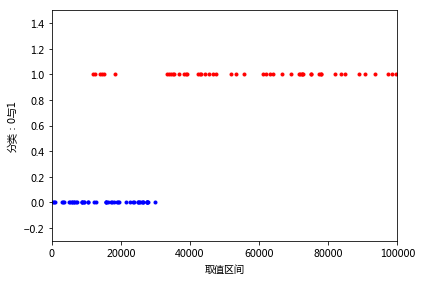

In [11]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

cls1_data = np.random.uniform(low=10000,high=100000,size=50)
cls1_result = np.ones(shape=(50),dtype=np.int32)

cls2_data = np.random.uniform(low=0,high=30000,size=50)
cls2_result = np.zeros(shape=(50),dtype=np.int32)

# 绘制样本
figure=plt.figure('用于线性回归的分类样本', figsize=(6, 4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='2类样本')
ax.set_xlabel('取值区间')
ax.set_ylabel('分类：0与1')

# 设置绘制曲线范围
ax.set_xlim(left=0,right=100000)    # x取值范围
ax.set_ylim(bottom=-0.3, top=1.5)    # 概率在[0, 1) 之间

ax.scatter(cls1_data,cls1_result,color='r',marker='.')

ax.scatter(cls2_data,cls2_result,color='b',marker='.')

figure.show(warn=False)


&emsp;&emsp;**使用线性回归分类**

评估： 0.555891654577714
斜率： [1.34255212e-05]
截距： 0.01655814267519684
[0.84828292 0.58331511 1.11550652 1.05660159 0.5944528  1.15643254
 1.14064579 0.94602928 0.48950987 0.48060621 0.5319122  0.71212052
 0.50981994 0.7330047  0.62845884 1.21112727 0.54341076 0.21257363
 0.26175963 1.02209569 1.23536988 0.53998925 0.98959512 0.17659679
 0.4907314  0.64503974 0.18405636 0.76383753 0.97628677 1.35292452
 0.20352834 0.98268824 1.06256155 1.32459732 0.99089918 0.46460692
 0.98906349 0.91117129 0.2198635  0.59830641 0.8756055  1.2736329
 0.83592414 1.06118727 0.65489012 0.8660766  0.61240252 1.33904091
 0.47394198 1.02521    0.05723705 0.37106916 0.33210881 0.33587503
 0.19013076 0.24586235 0.36920796 0.14182335 0.37130829 0.25797109
 0.2270329  0.27208044 0.15928228 0.1021966  0.17905334 0.22717218
 0.0948184  0.13249571 0.38909531 0.05946123 0.35638356 0.1328463
 0.0309184  0.41697969 0.08458613 0.11541662 0.08907712 0.02159664
 0.273264   0.13543039 0.27976214 0.38864573 0.02586998 0.351688

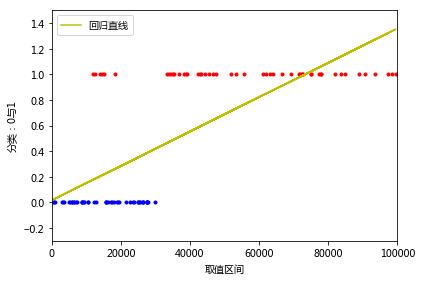

In [57]:
# 采用sklearn模块来实现线性回归
from sklearn.linear_model import *
import numpy as np
x=np.hstack((cls1_data,cls2_data))
y=np.hstack((cls1_result,cls2_result))
x=x.reshape(-1, 1)

regression=LinearRegression()
# 训练
# 数据格式整理
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
# 如果是一维特征，使用reshape处理单特征形状（-1, 1），如果只有一个样本，形状reshape(1,-1)
regression.fit(x, y)
# 测试
print('评估：',regression.score(x, y))
# 斜率
print('斜率：',regression.coef_)
# 截距
print('截距：',regression.intercept_ )

# 使用训练数据统计分类正确率
pre=regression.predict(x)
print(pre)
cls_a=pre[0:50]
cls_a=cls_a>0.5
a_num=cls_a.sum()

# 第二类：后50
cls_b=pre[50:]
cls_b=cls_b<0.5
b_num=cls_b.sum()
# 统计正确率
a_pct=cls_a.mean()
b_pct=cls_b.mean()
print("A类识别正确数：%d，识别正确率：%5.2f%%"%(a_num,a_pct*100))
print("B类识别正确数：%d，识别正确率：%5.2f%%"%(b_num,b_pct*100))
# 可视化分类情况
figure=plt.figure('分类情况', figsize=(6, 4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='2类样本')
ax.set_xlabel('取值区间')
ax.set_ylabel('分类：0与1')

# 设置绘制曲线范围
ax.set_xlim(left=0,right=100000)    # x取值范围
ax.set_ylim(bottom=-0.3, top=1.5)    # 概率在[0, 1) 之间

ax.scatter(cls1_data,cls1_result,color='r',marker='.')

ax.scatter(cls2_data,cls2_result,color='b',marker='.')

ax.plot(x, regression.predict(x),color='y', label='回归直线')

ax.legend()

figure.show(warn=False)


&emsp;&emsp;&emsp;&emsp;明显的两类样本是可分的，使用线性回归得到的分类效果明显存在较大误差。这是因为我们的样本违背了线性回归的三个假设：    
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-自变量与因变量是线性关系；      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-自变量与误差项相互独立；     
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-误差项服从正态分布；    

# 二、逻辑回归的数学基础

1. 从分类开始谈起 
&emsp;&emsp;某个样本属于A类还是B类，从结果上讲就是值为0，还是值为1。但影响这个分类的是由一些因素决定的。我们从数学角度可以使用向量表示这些因素（这些因素就影响某个样本属于A类还是B类）：    
&emsp;&emsp;     
&emsp;&emsp;$x=(x_1,x_2,\dots,x_n)$     
&emsp;&emsp;其中$x$就是表示一个样本，样本$x$具有n个影响分类的特征。如果考虑偏置项，则可以增加一个份量1。   
&emsp;&emsp;$x=(x_1,x_2,\dots,x_n,1)$   

2. 建立分类的逻辑模型    
&emsp;&emsp;我们假设有两套标准判定样本所属的分类，使用数学函数表示如下：     
&emsp;&emsp;&emsp;&emsp;|-&emsp;$y_A=f(x)$    &emsp;样本x属于A的可能性；   
&emsp;&emsp;&emsp;&emsp;|-&emsp;$y_B=g(x)$   &emsp;样本x属于B的可能性；       
&emsp;&emsp;    
&emsp;&emsp;这样我们就可以建立一个分类模型：   
&emsp;&emsp;      
&emsp;&emsp;$y=\begin{cases}
1,\quad y_A>y_B\\
0,\quad y_A\leqslant y_B\\
\end{cases}$     
&emsp;&emsp;    
&emsp;&emsp;当$y=1$，则样本$x$属于A类；当$y=0$，则样本$x$属于B类；  
&emsp;&emsp;    
&emsp;&emsp;可以把上述模型表示为：    
&emsp;&emsp;      
&emsp;&emsp;$y=\begin{cases}
1,\quad y_A-y_B>0\\
0,\quad 其他\\
\end{cases}$     


3.  分类逻辑模型的概率分析基础
&emsp;&emsp;   
&emsp;&emsp; 如果假设$y_A,y_B$与$x$是线性关系，同时考虑$y_A,y_B$的误差都独立服从正态分布，可以把$y_A,y_B$表示如下：   
&emsp;&emsp;    
&emsp;&emsp;|-  $y_A=xW_A+\epsilon_A$     
&emsp;&emsp;|-  $y_B=xW_B+\epsilon_B$     
&emsp;&emsp;        
&emsp;&emsp;其中$\epsilon_A,\epsilon_B$是服从独立分布的误差项，可以假设服从正态分布。    
&emsp;&emsp;记$z=y_A-y_B$，则：    
&emsp;&emsp;|-  $z=x(W_A-W_B)+(\epsilon_A-\epsilon_B)$      
&emsp;&emsp;  
&emsp;&emsp;从而分类逻辑模型可以表示如下：   
&emsp;&emsp;|-  $y=\begin{cases}
1,\quad z>0\\
0,\quad 其他\\
\end{cases}$     
&emsp;&emsp;其中$W=W_A-W_B,\epsilon=\epsilon_A-\epsilon_B$    
&emsp;&emsp;$z=xW+\epsilon$      
&emsp;&emsp;      
&emsp;&emsp;则样本X属于A的概率可以表示为：      
&emsp;&emsp;|-  $P(y=1)=P(z>0)=P(xW+\epsilon>0)=P(\epsilon>-xW)$    
&emsp;&emsp;从正态分布可以继续推导：   
&emsp;&emsp;|-  $P(y=1)=1-P(\epsilon\leqslant-xW)=1-F_{\epsilon}(-xW)$    
&emsp;&emsp;其中$F_{\epsilon}$是变量$\epsilon$的累积分布函数；$P(y=1)$表示样本属于A的概率   

4.  probit模型     
&emsp;&emsp;上述推导的公式在学术上称为**probit模型**，建立的回归模型也称proit回归。         
&emsp;&emsp;     
&emsp;&emsp;$P(y=1)=1-F_{\epsilon}(-xW)$     
&emsp;&emsp;    
&emsp;&emsp;$F_{\epsilon}(-xW)$是正态分布函数的累积函数，上述累积分布函数，在服从正态分布的时候比较麻烦，因为正态分布的累积函数还没有解析表达式能够表达。 从而其参数估计非常麻烦，如果需要应用，则需要简化（ 做近似处理 ）。    
&emsp;&emsp;为了解决正态分布累积函数的问题，正态分布的累积函数的计算居然是通过查表的形式提供运算结果，大家如果想不起，可以查阅自己的高中数据或者大学数学书。     

5. 正态分布的近似处理    
&emsp;&emsp;正态分布表示：   
&emsp;&emsp;$p(x)=\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(x-\mu)^2}{2\sigma^2})$&emsp;&emsp;&emsp;&emsp;其中：μ表示期望（均数），σ表示标准差，σ2表示方差     
&emsp;&emsp;     
&emsp;&emsp;记正态分布为$N(μ，σ)$ ，标准正态分布是$N( 0，1 )$       
&emsp;&emsp;    
&emsp;&emsp; 我们可以简化下正态分布累积函数的表示：   
&emsp;&emsp;$F_{\epsilon}(x)=\phi(\dfrac{x-\mu}{\sigma})$     
&emsp;&emsp;因为$\dfrac{x-\mu}{\sigma}$是线性，所以只需要考虑标准正态分布。     
&emsp;&emsp;在数学上存在一个逻辑分布，与正态分布非常相似，

6. 逻辑分布与标准正态分布     
&emsp;&emsp;下面使用可视化来认识下逻辑分布函数与正态分布函数的近似度。   
&emsp;&emsp;&emsp;&emsp;|-   正态分布：$p(x)=\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(x-\mu)^2}{2\sigma^2})$    
&emsp;&emsp;&emsp;&emsp;|-   逻辑分布：$p(x)=\dfrac{e^{-x}}{(1+e^{-x})^2}$
&emsp;&emsp;     
&emsp;&emsp;逻辑分布函数与正态分布的区别就在于：逻辑分布有累积函数，其累积函数如下：     
&emsp;&emsp;&emsp;&emsp;|-   逻辑分布累积函数：$S(x)=\dfrac{1}{1+e^{-x}}$     
&emsp;&emsp;      
&emsp;&emsp;下面是逻辑分布函数，正态分布函数的比较：   

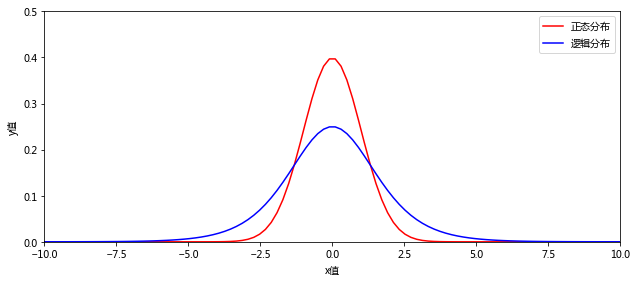

In [35]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#  绘图的坐标轴
figure=plt.figure('正态分布与逻辑分布', figsize=(10, 4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='逻辑分布与正态分布')
ax.set_xlabel('x值')
ax.set_ylabel('y值')

# 设置绘制曲线范围
ax.set_xlim(left=-10,right=10)    # x取值范围
ax.set_ylim(bottom=0, top=0.5)    # 概率在[0, 1) 之间

# 标准正态分布函数--------------------
# x取值范围
x_n=np.linspace( -10 ,10, 100,  dtype=np.float32 )
# 系数-方差
sigma=1
# 系数-均值
mu=0
# 正态分布常数系数
coefficient = 1.0 / ( np.sqrt( 2 * np.pi) * sigma )
# 正态分布指数
exponent = -(x_n-mu)**2/(2*sigma**2)
y_n=coefficient * np.exp( exponent )
ax.plot(x_n, y_n,color='r',label='正态分布')
# 逻辑分布函数--------------------
x_l=np.linspace( -10 ,10, 100,  dtype=np.float32 )
y_l=np.exp( -x_l ) / ( 1 + np.exp( -x_l ) )**2
ax.plot(x_l, y_l,color='b',label='逻辑分布')

ax.legend()

figure.show(warn=False)



7. 逻辑分布与标准正态分布的累积函数      
&emsp;&emsp;标准正态分布没有累积函数，所以我们采用scipy的积分函数来绘制。     
&emsp;&emsp;使用积分表示正态分布累积函数的公式如下：      
&emsp;&emsp;&emsp;&emsp;|-  $F_{\epsilon}(x)=\int_{-\infty}^{x}\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(t-\mu)^2}{2\sigma^2})\mathrm{d} t$，

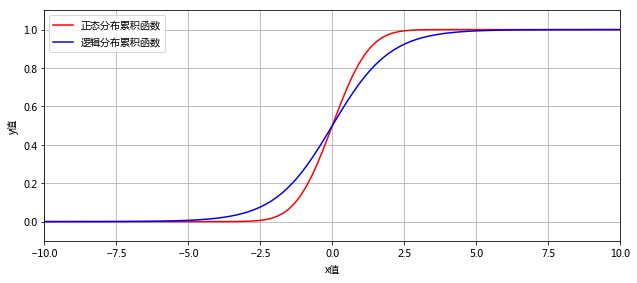

In [58]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

#  定义正态函数，用于积分运算
def  normal(t,m,s):
    # 系数-方差
    sigma=s
    # 系数-均值
    mu=m
    # 正态分布常数系数
    coefficient = 1.0 / ( np.sqrt( 2 * np.pi) * sigma )
    # 正态分布指数
    exponent = -(t-mu)**2/(2*sigma**2)
    re=coefficient * np.exp( exponent )
    return re

def cumulative(x):
    re=integrate.quad(     
        normal,         # 积分函数
        -np.inf,         # 积分下限
        x,              # 积分上限
        args=(0.0, 1.0)   # 传递给函数的参数（除第一个参数外，按照顺序来）
    )
    return re[0]     #第一个是积分，第二个是误差上限

#  绘图的坐标轴
figure=plt.figure('正态分布与逻辑分布', figsize=(10, 4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='逻辑分布与正态分布')
ax.set_xlabel('x值')
ax.set_ylabel('y值')

# 设置绘制曲线范围
ax.set_xlim(left=-10,right=10)    # x取值范围
ax.set_ylim(bottom=-0.1, top=1.1)    # 概率在[0, 1) 之间

# 标准正态分布函数--------------------
# x取值范围
x_n=np.linspace( -10 ,10, 100,  dtype=np.float32 )
y_n=[cumulative(x) for  x in x_n ]
ax.plot(x_n, y_n,color='r',label='正态分布累积函数')
# 逻辑分布函数--------------------
x_l=np.linspace( -10 ,10, 100,  dtype=np.float32 )
y_l=1.0 / ( 1 + np.exp( -x_l ) )
ax.plot(x_l, y_l,color='b',label='逻辑分布累积函数')

ax.legend()
ax.grid(b=True)

figure.show(warn=False)

8. 最佳的逻辑分布      
&emsp;&emsp;如果逻辑分布参数做一些调整，可以最佳接近。下面是最佳逻辑分布累积函数表示：    
&emsp;&emsp;&emsp;&emsp;|-   $S(x)=\dfrac{1}{1+e^{-1.702x}}$      
&emsp;&emsp;下面是可视化后的直观效果。

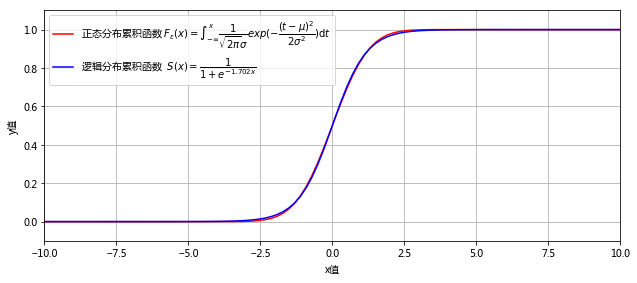

In [56]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

#  定义正态函数，用于积分运算
def  normal(t,m,s):
    # 系数-方差
    sigma=s
    # 系数-均值
    mu=m
    # 正态分布常数系数
    coefficient = 1.0 / ( np.sqrt( 2 * np.pi) * sigma )
    # 正态分布指数
    exponent = -(t-mu)**2/(2*sigma**2)
    re=coefficient * np.exp( exponent )
    return re

def cumulative(x):
    re=integrate.quad(     
        normal,         # 积分函数
        -np.inf,         # 积分下限
        x,              # 积分上限
        args=(0.0, 1.0)   # 传递给函数的参数（除第一个参数外，按照顺序来）
    )
    return re[0]     #第一个是积分，第二个是误差上限

#  绘图的坐标轴
figure=plt.figure('正态分布与逻辑分布', figsize=(10, 4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='逻辑分布与正态分布')
ax.set_xlabel('x值')
ax.set_ylabel('y值')

# 设置绘制曲线范围
ax.set_xlim(left=-10,right=10)    # x取值范围
ax.set_ylim(bottom=-0.1, top=1.1)    # 概率在[0, 1) 之间

# 标准正态分布函数--------------------
# x取值范围
x_n=np.linspace( -10 ,10, 100,  dtype=np.float32 )
y_n=[cumulative(x) for  x in x_n ]
ax.plot(x_n, y_n,color='r',label='正态分布累积函数 $F_{\epsilon}(x)=\int_{-\infty}^{x}\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{(t-\mu)^2}{2\sigma^2})\mathrm{d} t$')
# 逻辑分布函数--------------------
x_l=np.linspace( -10 ,10, 100,  dtype=np.float32 )
y_l=1.0 / ( 1 + np.exp( -1.702*x_l ) )
ax.plot(x_l, y_l,color='b',label='逻辑分布累积函数  $S(x)=\dfrac{1}{1+e^{-1.702x}}$ ')

ax.legend()
ax.grid(b=True)

figure.show(warn=False)

9.sigmoid函数     
&emsp;&emsp;$S(x)=\dfrac{1}{1+e^{-1.702x}}$ 就是鼎鼎大名的sigmoid函数，该函数具备许多良好的性质。尤其是深度学习中的大杀器！经常会用到。      
&emsp;&emsp;**函数的特点：**    
&emsp;&emsp;&emsp;&emsp;|- 函数的导数可以用自身表示： $S^\prime(x)=S(x)(1-S(x))$       
&emsp;&emsp;&emsp;&emsp;|- 连续处处可微   
&emsp;&emsp;&emsp;&emsp;|- 值在\[0,1)范围    
&emsp;&emsp;&emsp;&emsp;|- 单调递增    
&emsp;&emsp;&emsp;&emsp;|- 非线性     
&emsp;&emsp;&emsp;&emsp;|- 平滑性    
&emsp;&emsp;&emsp;&emsp;|- 原点附近近似identity（f(x)≈x）或者先线性性。     
&emsp;&emsp;**函数的缺点：**       
&emsp;&emsp;&emsp;&emsp;|- 运算量大（后面使用梯度下降算法可以提现出来，尤其误差传递的时候）   
&emsp;&emsp;&emsp;&emsp;|- 容易出现梯度消失的情况，从而不利于样本训练，甚至完不成梯度训练。（大家可以从逻辑分布函数看得出来，sigmoid函数的导数就是逻辑分布函数，逻辑分布函数从0开始，就逐步趋向于0，容易产生梯度消失）    

# 三、逻辑回归模型与模型推导



1. 逻辑回归模型     
&emsp;&emsp;从上述逻辑分布与正态分布的相似性，可以得到逻辑回归模型:            
&emsp;&emsp;     
&emsp;&emsp;&emsp;&emsp;|- （1）proit回归模型：  $p(y=1)=1-F_{\epsilon}(-xW)$    
&emsp;&emsp;&emsp;&emsp;|- （2）正态分布简写模型：$F_{\epsilon}(x)=\phi(\dfrac{x-\mu}{\sigma})
\qquad\to\qquad F_{\epsilon}(\sigma x+\mu)=\phi(x) \approx S(1.702x) $     
&emsp;&emsp;      
&emsp;&emsp;在porit回归模型基础上，简单推导，可以定义如下模型：    
&emsp;&emsp;&emsp;&emsp;   |- $p(y=1) =\dfrac{1}{1+e^{-xW}}$    
&emsp;&emsp;&emsp;&emsp;上上述公式就是**逻辑回归模型**（省略了具体的推导还有一部分假设）。

2. 发生比      
&emsp;&emsp; 我们可以定义$\dfrac{p(y=1)}{1-p(y=1)}$为发生比。 然后简单取自然对数，得到如下公式：     
&emsp;&emsp; $ln \dfrac{p(y=1)}{1-p(y=1)}=xW$
&emsp;&emsp;     
&emsp;&emsp; 逻辑回归是建立在一个假设之上：事件发生比实际上是一个**线性模型**。  

3. 似然函数     
&emsp;&emsp;逻辑回归的算法还是要从模型参数的估计开始。      
&emsp;&emsp;从统计来说，数据出现的概率越大越好，这就是最大似然估计法，由于数据的取值是离散的0，1，从而数据取值的概率分布函数可以表示为(这里用到了二项分布概率累积函数的计算方法)：    
&emsp;&emsp;&emsp;&emsp;|- $p(y)={p(y=1)}^{y}{p(y=0)}^{1-y}$     
&emsp;&emsp;取自然对数：   
&emsp;&emsp;&emsp;&emsp;|-$ln\ p(y)=y\ ln\ p(y=1) + (1-y)\ ln\ (1- p(y=1))$     
&emsp;&emsp;      
&emsp;&emsp;考虑所有样本，而且每个样本独立，所以可以对所有样本形成下面公式：     
&emsp;&emsp;&emsp;&emsp;|-$p(Y)=\prod\limits_ip(y_i)$   其中$i$表示遍历所有样本，$y_i$表示其中第$i$个样本。 &emsp;&emsp;      
&emsp;&emsp;把所有样本的概率分布函数展开：    
&emsp;&emsp;&emsp;&emsp;|-$p(Y)=\prod\limits_i {p(y_i=1)}^{y_i}{p(y_i=0)}^{1-y_i}$      
&emsp;&emsp;替换为概率分布函数：sigmoid函数，可以得到如下公式：     
&emsp;&emsp;&emsp;&emsp;|-$p(Y)=\prod\limits_i {h(X_i)}^{y_i}{(1-h(X_i))}^{1-y_i}$       
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;其中$h(X_i)$表示sigmoid函数$h(X_i) =\dfrac{1}{1+e^{-X_iW}}$    ，$X_i$表示第$i$个样本。   
&emsp;&emsp;上述公式就是W的似然函数，可以更加明确的按照条件概率方式记为：     
&emsp;&emsp;&emsp;&emsp;|-$L(W)=p(Y|W)=\prod\limits_i {h(X_i)}^{y_i}{(1-h(X_i))}^{1-y_i}$          

4. 参数估计公式推导  
&emsp;&emsp;使用最大似然估计法，可以得到W的参数估计公式（求对数）：  
&emsp;&emsp;&emsp;&emsp;|- $l(W)=ln(L(W))=\sum\limits_{i}y_i\ ln(h(X_i)) +(1-y_i)\ln(1-h(X_i))$

5. 机器学习的损失函数定义      
&emsp;&emsp;由于使似然函数值最大，相反考虑，定义损失函数如下：   
&emsp;&emsp;&emsp;&emsp;$Loss= - ln(L(W))=-l(W)$     
&emsp;&emsp;这样就使得问题编程求最小值，我们可以定义成逻辑回归模型的损失函数。使用算法找到$Loss$的最小值即可。        

# 四、逻辑回归模型定义    

1.  决策函数   
&emsp;&emsp; $y_i=S(X_iW)$     
&emsp;&emsp;    
&emsp;&emsp; 其中$S(x)= \dfrac{1}{1+e^{-x}}$是sigmoid函数                
&emsp;&emsp; 其中$X_i=(x_1,x_2,\dots,x_n,1)$是第$i$个样本数据。        
&emsp;&emsp; 其中$W$是样本的线性系数，也可以理解成样本特征的重要性加权。       

2. 机器学习中的误差定义      
&emsp;&emsp; $Loss=J(W)=-l(W)=-ln(L(W))=-\sum\limits_{i}y_i\ ln(h(X_i)) +(1-y_i)\ln(1-h(X_i))$      
&emsp;&emsp;上述公式被称为交叉熵（Cross   Entropy）  
&emsp;&emsp;其中$h(X_i)=S(X_iW)= \dfrac{1}{1+e^{-X_iW}}$ 

# 五、逻辑回归的算法推导

&emsp;&emsp;逻辑回归最终还是找到一个W，使得分类误差最小，也就是使得损失函数最小，所以逻辑回归属于于广义线性回归的一种。     
&emsp;&emsp;逻辑回归算法也是找到一个W，使得对所有样本$J(W)$函数的值最小， 由于考虑问题的思路不同，这里的$J(W)$不再像线性回归函数那样：通过推导直接得到$W$的求解公式。       
&emsp;&emsp;下面我们尝试使用求导的方式，来推导能否求解&J(W)&的最小值，从而得到W的解。    

&emsp;&emsp;推导前的一个已知知识：sigmoid函数（也称S曲线函数）有一个显著特性就是其导数可以使用自身表示。    
&emsp;&emsp;&emsp;&emsp;|-   $S^\prime(x)=S(x)(1-S(x))$     

1. 求偏导数

 $\nabla_W J(W)=\nabla_W(-\sum\limits_{i}y_i\ ln(h(X_i)) +(1-y_i)\ln(1-h(X_i)))$     

$\nabla_W J(W)=\dfrac{\partial J(W)}{\partial W}=-\sum\limits_i (\dfrac{y_i}{h(X_i)} + \dfrac{1-y_i}{1-h(Xi)} ) \dfrac{\partial h(X_i)}{\partial W} $

$\nabla_W J(W)=-\sum\limits_i (\dfrac{y_i}{h(X_i)} + \dfrac{1-y_i}{1-h(Xi)} ) (h(X_i)(1-h(X_i))) \dfrac{\partial X_iW)}{\partial W} $

&emsp;&emsp;上述推导基于一个数学知识：链式求偏导公式。下面继续推导：        

$\nabla_W J(W)=-\sum\limits_i (y_i(1-h(X_i)) - (1-y_i)h(X_i) ) X_i $

&emsp;&emsp;上述公式注意最后的推导，我们直接采用了向量求导，直接得到$X_i$。     
&emsp;&emsp;下面对前面几项做多项式拆分，得到如下公式：     

$\nabla_W J(W)=-\sum\limits_i (y_i- y_i\ h(X_i) + y_i\ h(X_i) -h(X_i) ) X_i $        
$\nabla_W J(W)=-\sum\limits_i (y_i -h(X_i) ) X_i $       
$\nabla_W J(W)=\sum\limits_i (h(X_i)-y_i ) X_i $

2. 求解W       
&emsp;&emsp;按照原来的套路，利用极值求解W，由于其中$h(X_i)$是一个指数函数，加上求和等线性因素，上述公式按照导数=0的方式求解非常麻烦，应该说无法使用公式推导求的W的值。  下面我们来回顾下，数学中求极值算法。              

3. 从最大似然函数的推导结果看问题              
&emsp;&emsp;最大似然函数       
&emsp;&emsp;&emsp;&emsp;|-均方差(损失函数)     
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-线性（Closed-Form）  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-最小二乘法     
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-非线性      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-梯度下降法        
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-牛顿迭代法      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-拟牛顿法      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-坐标下降法      
&emsp;&emsp;&emsp;&emsp;|-交叉熵(损失函数)      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-非线性      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-梯度下降法       
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-牛顿迭代法      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-拟牛顿法      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-坐标下降法      

&emsp;&emsp;从机器学习的角度，通过建模的模型分析，得到一个评估学习模型好坏的标准-损失函数，然后建立训练目标。    
&emsp;&emsp;其中损失函数一般是损失最小，为了使得损失函数最小，就需要各种算法。          
&emsp;&emsp;下面列出在不同模型中常用的损失函数（后面逐步讲解每个损失函数的来源）     
&emsp;&emsp;
&emsp;&emsp;梯度下降法：
&emsp;&emsp;&emsp;&emsp;|-全梯度下降法 （FG）     
&emsp;&emsp;&emsp;&emsp;|-随机梯度下降算法 （SG）     
&emsp;&emsp;&emsp;&emsp;|-随机平均梯度下降算法 （SAG）     
&emsp;&emsp;&emsp;&emsp;|-小批量梯度下降算法 （mini-bantch）     
&emsp;&emsp;&emsp;&emsp;|-随机方差缩减法（ SAGA）(STOCHASTIC VARIANCE REDUCTION METHODS)


4. 常见的损失误差：    
&emsp;&emsp;|-1. 铰链损失（Hinge Loss）：主要用于支持向量机（SVM） 中；    
&emsp;&emsp;|-2. 互熵损失 （Cross Entropy Loss，Softmax Loss ）：用于Logistic 回归与Softmax 分类中；    
&emsp;&emsp;|-3. 平方损失（Square Loss）：主要是最小二乘法（OLS）中；     
&emsp;&emsp;|-4. 指数损失（Exponential Loss） ：主要用于Adaboost 集成学习算法中；     
&emsp;&emsp;|-5. 其他损失（如0-1损失，绝对值损失）    


# 六、梯度下降算法

1. 梯度下降算法的前置条件      
&emsp;&emsp;|-梯度下降就是让一个损失函数最小，所以梯度下降首先需要一个损失函数。     
&emsp;&emsp;|-梯度下降使得损失函数最小， 必须是因为某个量，在我们的机器学习中， 这个量都是特征（$X_i$）权重的影响量； 在线性回归与逻辑回归中就是线性系数$W$。     

&emsp;&emsp;（1）线性回归中，损失函数是：      
&emsp;&emsp;&emsp;&emsp;|-$J(W)=\dfrac{1}{2}\sum\limits_{i=1}^{m}(x^{(i)}W-y^{(i)})^2$           
&emsp;&emsp;（2）逻辑回归中，损失函数是：     
&emsp;&emsp;&emsp;&emsp;|- $J(W)=-l(W)=-ln(L(W))=-\sum\limits_{i}y_i\ ln(h(X_i)) +(1-y_i)\ln(1-h(X_i))$      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-上述公式被称为交叉熵（Cross   Entropy）    
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-其中$h(X_i)=S(X_iW)= \dfrac{1}{1+e^{-X_iW}}$         

2. 梯度下降的数学极值与凸优化理论                     
&emsp;&emsp;求最小值，大家第一个想到的就是**极值定理**。       
&emsp;&emsp;&emsp;&emsp;|-极大值与极小值就是函数在其定义域的某些局部区域所达到的相对最大值或相对最小值。当函数在其定义域的某一点的值大于该点周围 任何点的值时，称函数在该点有极大值; 当函数在其定义域的某一点的值小于该点周围任何点的值时， 称函数在该点有极小值。这里的极大和极小只具有局部意义。       
&emsp;&emsp;&emsp;&emsp;|-极值点：极值点只能在函数不可导的点或导数为零的点上取得。    
     
&emsp;&emsp; &emsp;&emsp;**极值定理**      
>对于一元可微函数𝒇(𝑥)，它在某点x0有极值的充分必要条件是𝒇(𝑥)在𝑥0的某邻域上一阶可导，在𝑥0处二阶可导，且𝒇'(𝑥0)=0，𝒇' '(𝑥0)≠0，那么：
>
>            1）若𝒇' '(𝑥0)<0，则f在x0取得极大值；
>
>            2）若𝒇' '(𝑥0)>0，则f在x0取得极小值。
>
>求解极值，直接解𝒇 ' (𝑥0)=0方程，可以得到极值点。

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**最值与极值**         
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;因为极值是局部意义上的，最值是全局意义上的；在算法过程中，容易导致求出的极值在局部最大，在全局不是最大。为了保证极值就是最值，需要函数满足凸性。      
    
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**凸集**       
>&emsp;&emsp;对于集合$X$满足：任给的$x,y∈X$,总有$λx+(1−λ)y∈X$,对于任意的$ λ∈(0,1)$，我们称X是凸集。        

&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;**凸函数**       
>&emsp;&emsp;对于一个函数$f(x)$，满足：任给的$x,y∈X$（$X$是函数定义域）。总有$f(λx+(1−λ)y))≤λf(x)+(1−λ)f(y)$,对于任意的$ λ∈(0,1)$，我们称$f(x)$为凸函数。        
>&emsp;&emsp;换成几何描述就是，函数的几何图形中任意两个点的连线上的点都在函数的几何图形中。    

3. 均方差函数的可视化      
&emsp;&emsp;均方差函数本身是凸的，  如果从权重考虑，则发现该函数在逻辑回归中是非凸的。    
&emsp;&emsp;从输出的图形来看是凸的。   

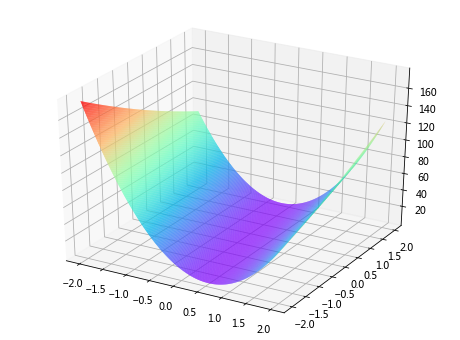

In [67]:
%  matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure('3D可视化',figsize=(8,6))
# 创建3D图形
# 方式一：
# ax = Axes3D(fig)
# 方式二：
ax = fig.add_subplot(111, projection='3d')
# J(W)对多个样本绘制
# 年龄
x = np.loadtxt('ex2x.dat')
# 身高
y = np.loadtxt('ex2y.dat')


w = np.arange(-2, 2, 0.02)
b = np.arange(-2, 2, 0.02)
w, b = np.meshgrid(w, b)    # x-y 平面的网格

z=0
for i in range(len(x)):
    z += ( ( x[i]*w + b - y[i])**2 ) 
z/=len(x)

# rstride:行之间的跨度  cstride:列之间的跨度
ax.plot_surface(w, b, z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'),label='三维抛物面')
# 设置图像z轴的显示范围，x、y轴设置方式相同
#ax.set_xlim(-2,2)
#ax.set_ylim(-2,2)
#ax.set_zlim(0,4)

plt.show()



4. 均方差采用S曲线函数输出的可视化     
&emsp;&emsp;从输出的图形来看，非凸，所以在逻辑回归的损失函数，采用均方差公式训练会存在错误收敛的问题。     

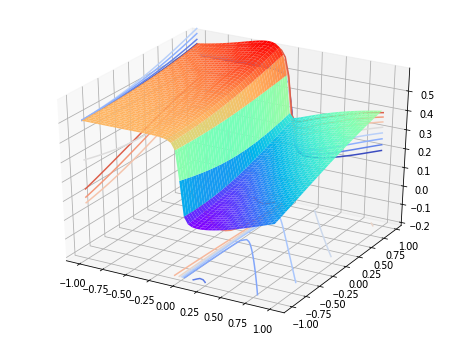

In [137]:
%  matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure('3D可视化',figsize=(8,6))
# 创建3D图形
# 方式一：
# ax = Axes3D(fig)
# 方式二：
ax = fig.add_subplot(111, projection='3d')
# J(W)对多个样本绘制
cls1_data = np.random.uniform(low=0,high=100,size=50)
cls1_result = np.ones(shape=(50),dtype=np.int32)

cls2_data = np.random.uniform(low=0,high=3,size=50)
cls2_result = np.zeros(shape=(50),dtype=np.int32)

x=np.hstack((cls1_data,cls2_data))
y=np.hstack((cls1_result,cls2_result))

w = np.arange(-1, 1, 0.04)
b = np.arange(-1, 1, 0.04)
w, b = np.meshgrid(w, b)    # x-y 平面的网格


s=lambda  p: 1.0/(1+np.exp(-p))

z=0
for i in range(len(x)):
    z += ( ( s(x[i]*w + b) - y[i] )**2 ) 
z/=len(x)
    
# rstride:行之间的跨度  cstride:列之间的跨度
ax.plot_surface(w, b, z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'),label='三维抛物面')

#等高线绘制（直观想象3D图形）
cset = ax.contour(w, b, z, zdir='z', offset=-0.2, cmap=cm.coolwarm)
cset = ax.contour(w, b, z, zdir='x', offset=-1, cmap=cm.coolwarm)
cset = ax.contour(w, b, z, zdir='y', offset=1, cmap=cm.coolwarm)

ax.set_xlim(-1.1,1.1)
ax.set_xlim(-1.1,1.1)
ax.set_zlim(-0.2,0.6)
plt.show()



4. 交叉熵函数的可视化     
&emsp;&emsp;$J(W)=-ln(L(W))=-\sum\limits_{i}y_i\ ln(h(X_i)) +(1-y_i)\ln(1-h(X_i))$      
&emsp;&emsp;&emsp;&emsp;|-其中$h(X_i)=S(X_iW)= \dfrac{1}{1+e^{-X_iW}}$      
&emsp;&emsp;      
&emsp;&emsp;在下面例子中，为了避免计算精度产生的问题，我们对样本数据同比缩小，限制在0.1之间（一种正则化思维），这样可以避免数据计算溢出的问题（无穷大与无穷小的问题）   
&emsp;&emsp; 从下面可视化效果上，看的出损失函数是凸的。实际上从数学推理上也可以证明，上面的公式非凸，这个公式是凸的。           


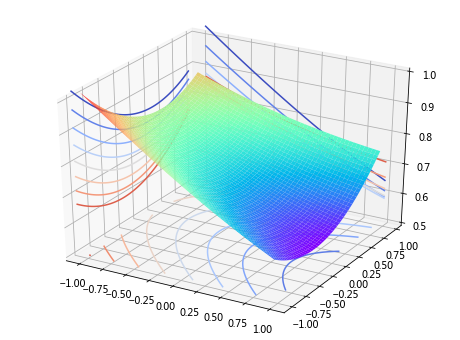

In [140]:
%  matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure('3D可视化',figsize=(8,6))
# 创建3D图形
# 方式一：
# ax = Axes3D(fig)
# 方式二：
ax = fig.add_subplot(111, projection='3d')
# J(W)对多个样本绘制
cls1_data = np.random.uniform(low=0.0,high=1.0,size=50)
cls1_result = np.ones(shape=(50),dtype=np.float32)

cls2_data = np.random.uniform(low=0.01,high=0.04,size=50)
cls2_result = np.zeros(shape=(50),dtype=np.float32)

x=np.hstack((cls1_data,cls2_data))
y=np.hstack((cls1_result,cls2_result))

w = np.arange(-1, 1, 0.04,dtype=np.float64)
b = np.arange(-1, 1, 0.04,dtype=np.float64)
w, b = np.meshgrid(w, b)    # x-y 平面的网格

s=lambda  p: 1.0/(1.0+np.exp(-p))

for i in range(len(x)):
    z+=y[i]*np.log(s(x[i]*w+b))+(1.0-y[i])*(np.log(1.0-s(x[i]*w+b)))
z=-z
z/=len(x)

# rstride:行之间的跨度  cstride:列之间的跨度
ax.plot_surface(w, b, z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'),label='三维抛物面')

#等高线绘制（直观想象3D图形）
cset = ax.contour(w, b, z, zdir='z', offset=0.5, cmap=cm.coolwarm)
cset = ax.contour(w, b, z, zdir='x', offset=-1.1, cmap=cm.coolwarm)
cset = ax.contour(w, b, z, zdir='y', offset=1.1, cmap=cm.coolwarm)

ax.set_xlim(-1.1,1.1)
ax.set_xlim(-1.1,1.1)
ax.set_zlim(0.5,1)

plt.show()



5. 交叉熵函数凸性证明      
&emsp;&emsp;为了证明交叉熵函数是凸的，只需要求二阶导数就可以（这里用到凸优定理）：     
&emsp;&emsp;上面已经求出一阶导数：$\nabla_W J(W)=\sum\limits_i (h(X_i)-y_i ) X_i $        
&emsp;&emsp;&emsp;&emsp;|-$\dfrac{\partial^2J(w)}{\partial{W}\partial{W^T}}=\dfrac{\partial{\sum\limits_i (h(X_i)-y_i ) X_i}}{\partial{W^T}} $       
&emsp;&emsp;&emsp;&emsp;|-$\dfrac{\partial^2J(w)}{\partial{W}\partial{W^T}}=\sum\limits_i {\dfrac{\partial{(h(X_i)-y_i)}}{\partial{W^T}}X_i } $    
&emsp;&emsp;&emsp;&emsp;|-$\dfrac{\partial^2J(w)}{\partial{W}\partial{W^T}}=\sum\limits_i {\dfrac{\partial{(h(X_i)-y_i)}}{\partial{W^T}}X_i } $       
&emsp;&emsp;&emsp;&emsp;|-$\dfrac{\partial^2J(w)}{\partial{W}\partial{W^T}}=\sum\limits_i {\dfrac{\partial{h(X_i)}}{\partial{W^T}}X_i } $       
&emsp;&emsp;&emsp;&emsp;|-$\dfrac{\partial^2J(w)}{\partial{W}\partial{W^T}}=\sum\limits_i {\dfrac{e^{X_iW}{X_i}^T}{{(1+e^{X_iW})}^2}X_i} $      
&emsp;&emsp;&emsp;&emsp;|-$\dfrac{\partial^2J(w)}{\partial{W}\partial{W^T}}=\sum\limits_i {\dfrac{e^{X_iW}}{{(1+e^{X_iW})}^2}{X_i}^T X_i} $ &emsp;&emsp;           
&emsp;&emsp;由于$\dfrac{\partial^2J(w)}{\partial{W}\partial{W^T}}$是半负定矩阵，所以$L(W)$是凸函数，有最小值。    


6. 最小值梯度下降求解    
&emsp;&emsp; 由于$J(W)$函数我们从可视化直观观察，还是通过数学证明，都知道是凸函数，并具有最小值（ 注意对似然函数来讲是最大值，我们添加了一个负号- ）。   由于难以使用公式符号推导求解，所以这里采用梯度下降求解。      
&emsp;&emsp; **梯度下降求解的原理**      
&emsp;&emsp; &emsp;&emsp; |-（1）取一个**初始随机**的$W$（这里包含偏置项）；    
&emsp;&emsp; &emsp;&emsp; |-（2）根据逻辑回归模型的**决策函数**$y_i=S(X_iW)$ 计算出**预测值**；   
&emsp;&emsp; &emsp;&emsp; |-（3）如果**预测值**与**实际值**有差异，则调整$W$的值；   
&emsp;&emsp; &emsp;&emsp; |-（4）调整值一定要往**最小值点方向调整**；    
&emsp;&emsp; &emsp;&emsp; |-（5）**n次**以后，我们可以认为$W$是使得损失函数最小的稳定值。        


7. 梯度下降的方向与速度
&emsp;&emsp;     
&emsp;&emsp; **梯度下降的方向**            
&emsp;&emsp;&emsp;&emsp;怎么保证调整的值是往最小值方向调整的呢？   用下图的抛物线（凸函数）来充分说明梯度方向的选择（最小值情况）。     
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-  为了趋向最小值点，在最小值左边应该是增加$W$，在最小值右边应该是减少$W$（W是x轴）     
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-  如果去$J(W)$的导数作为$W$的调整值，就可以很方便地决定方向，因为在最小值左边导数为负，载最小值右边导数为正。       
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-  如果取导数作为调整值，则最小值左边减去导数值（$W$增加），最小值右边加上导数值（$W$减少）。       
&emsp;&emsp;    
&emsp;&emsp; **梯度下降的速度**          
&emsp;&emsp;&emsp;&emsp;从下图可以看见，如果$W$的值调整过大，在最值点会摆动很大，导致无法准确得到最好的$W$，为了控制在最小值点摆动产生的过拟合，可以对调整值加上一个参数$\eta$来控制。    
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-参数$\eta$越大，训练速度快，取得的训练值容易过拟合。      
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;|-参数$\eta$越小，训练速度慢，容易取得最好训练值。     

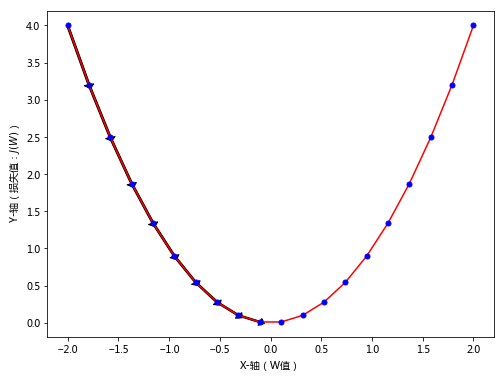

In [185]:
%  matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure('梯度下降说明',figsize=(8,6))
ax = fig.add_subplot(111,label='梯度下降说明',xlabel='X-轴（W值）',ylabel='Y-轴（损失值：$J(W)$）')
x = np.linspace(-2.0, 2.0, 20)
y = x**2
ax.plot(x, y,label='二次凸曲线',color=(1,0,0,1),marker='.',markersize=10,markerfacecolor=(0,0,1,1),markeredgecolor=(0,0,1,1))
for i in range(9):
    ax.arrow(x=x[i],y=y[i],dx=x[i+1]-x[i],dy=y[i+1]-y[i],width=0.02,color=(0,0,0,1) ,head_width=0.1,head_length=0.05)

plt.show()

# 七、线性回归sklearn实现

1. 采用极端样本分类       

In [217]:
from sklearn.linear_model import *
import numpy as np

cls1_data = np.random.uniform(low=1,high=10,size=50)
cls1_result = np.ones(shape=(50),dtype=np.int32)

cls2_data = np.random.uniform(low=0,high=3,size=50)
cls2_result = np.zeros(shape=(50),dtype=np.int32)

x=np.hstack((cls1_data,cls2_data))
y=np.hstack((cls1_result,cls2_result))

x=x.reshape(-1, 1)

# 逻辑回归
logreg = LogisticRegression(C=10e10,max_iter=10000)
logreg.fit(x, y)

print('训练样本预测结果：',logreg.predict(x))
print('识别精确率：',logreg.score(x,y))     #

训练样本预测结果： [1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
识别精确率： 0.92


2. 可视化训练结果

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


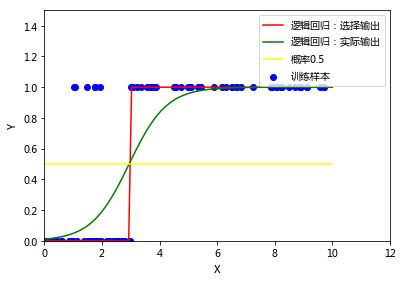

In [228]:
import matplotlib.pyplot as plt


figure = plt.figure('机器学习sklearn可视化',figsize=(6,4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='逻辑回归')
ax.set_xlim(left=0,right=12)
ax.set_ylim(bottom=0,top=1.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
# 绘制训练样本
ax.scatter(x=x, y=y,color='b',label='训练样本')


X=np.linspace(0,10,100)
Y=logreg.predict(X.reshape(-1,1))
print(Y)
# 绘制直线
ax.plot(X,Y,color='r',label='逻辑回归：选择输出')


s=lambda p:1.0/(1+np.exp(-p))
ax.plot(X,s(X.reshape(100,1)@logreg.coef_+logreg.intercept_),color='g',label='逻辑回归：实际输出')
ax.plot(X,[0.5 for i in x],color=(1,1,0,1),label='概率0.5')
ax.legend()

plt.show()

2. 采用身高体重样本      
&emsp;&emsp;逻辑回归只适用于0-1输出的分类，不适合连续值。       
&emsp;&emsp;下面代码会报错误。      

In [206]:
from sklearn.linear_model import *
import numpy as np

X_DATA = np.loadtxt('ex2x.dat')
# 身高
Y_DATA = np.loadtxt('ex2y.dat')


X_DATA=X_DATA.reshape(-1, 1)

# 逻辑回归
logreg = LogisticRegression(C=10e10,max_iter=10000)
logreg.fit(X_DATA, Y_DATA)

print('训练样本预测结果：',logreg.predict(X_DATA))
print('识别精确率：',logreg.score(X_DATA,Y_DATA))     #

ValueError: Unknown label type: 'continuous'

3. 采用鸢尾花样本（第一类与第二类者第三类）  
&emsp;&emsp;该样本的50个与后面100个是线性可分的，第50-100与100-150是线性不可分    

In [215]:
from sklearn.linear_model import *
import numpy as np
from sklearn import datasets

data,target=datasets.load_iris(return_X_y=True)

X_DATA=data[0:100]
Y_DATA=target[0:100]

# 逻辑回归
logreg = LogisticRegression(C=10e10,max_iter=10000)
logreg.fit(X_DATA, Y_DATA)

print('训练样本预测结果：',logreg.predict(X_DATA))#
print('识别精确率：%5.2f%%'%(logreg.score(X_DATA,Y_DATA)*100))     #

训练样本预测结果： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
识别精确率：100.00%


4. 采用鸢尾花样本（第二类与第三类）  
&emsp;&emsp;该样本的50个与后面100个是线性可分的，第50-100与100-150是线性不可分    

In [229]:
from sklearn.linear_model import *
import numpy as np
from sklearn import datasets

data,target=datasets.load_iris(return_X_y=True)

X_DATA=data[50:150]
Y_DATA=target[0:100]

# 逻辑回归
logreg = LogisticRegression(C=10e10,max_iter=10000)
logreg.fit(X_DATA, Y_DATA)
print(logreg.coef_)
print(logreg.intercept_)
print('训练样本预测结果：',logreg.predict(X_DATA))#
print('识别精确率：%5.2f%%'%(logreg.score(X_DATA,Y_DATA)*100))     #

[[-2.46368253 -6.67654959  9.41722578 18.27097595]]
[-42.57423423]
训练样本预测结果： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
识别精确率：98.00%


# 八、tensorflow实现

1. 梯度下降法几个条件           
&emsp;&emsp;|-决策计算模型      
&emsp;&emsp;&emsp;&emsp;|-$y_i=S(X_iW)$     
&emsp;&emsp;     
&emsp;&emsp;|-损失函数（版本一）          
&emsp;&emsp;&emsp;&emsp;|- $J(W)=-ln(L(W))=-\sum\limits_{i}y_i\ ln(h(X_i)) +(1-y_i)\ln(1-h(X_i))$     
&emsp;&emsp;|-损失函数（版本二）有的为了计算的方便会增加一个$\dfrac{1}{m}$因子，看起来像求均值。           
&emsp;&emsp;&emsp;&emsp;|- $J(W)=-\dfrac{1}{m}ln(L(W))=-\dfrac{1}{m} \sum\limits_{i}^{m} y_i\ ln(h(X_i)) +(1-y_i)\ln(1-h(X_i))$  
 

2. 梯度下降通用推导    
&emsp;&emsp;|-梯度计算（通用版）   
&emsp;&emsp;&emsp;&emsp;|-$\nabla_W J(W)= \dfrac{ \partial J(W) }{\partial W}$      
&emsp;&emsp;|-根据链式偏导可以分解求导参数的链式分解：     
&emsp;&emsp;&emsp;&emsp;|-$\nabla_W J(W)= \dfrac{ \partial J(W) }{\partial y_i}\  \dfrac{\partial y_i}{\partial W}$     
&emsp;&emsp;&emsp;&emsp;|-$\nabla_W J(W)= \dfrac{ \partial J(W) }{\partial y_i}\  \dfrac{\partial y_i}{\partial X_iW}\ \dfrac{\partial X_iW}{\partial W}$     
&emsp;&emsp;&emsp;&emsp;|-$\nabla_W J(W)= \dfrac{ \partial J(W) }{\partial y_i}\  \dfrac{\partial y_i}{\partial X_iW}\ X_i$     
&emsp;&emsp;|-这种通用的梯度推导结构由三个因素决定：     
&emsp;&emsp;&emsp;&emsp;|-（1）损失函数的导数        
&emsp;&emsp;&emsp;&emsp;|-（2）输出控制函数的导数     
&emsp;&emsp;&emsp;&emsp;|-（3）输入特征    
&emsp;&emsp;|-通常把前面两项称为误差项$\delta$：       
&emsp;&emsp;&emsp;&emsp;|- $\delta=\dfrac{ \partial J(W) }{\partial y_i}\  \dfrac{\partial y_i}{\partial X_iW}$       
&emsp;&emsp;|-可以使用导数表示误差项$\delta$：      
&emsp;&emsp;&emsp;&emsp;|- $\delta=J^{\prime}(\bar{y_i})\  S^\prime(X_iW)$      
&emsp;&emsp;      
&emsp;&emsp;注意：这里我们使用了一个符号$\bar{y_i}$用来区分$y_i$，$\bar{y_i}$表示理想输出值，表示样本实际输出结果。     
&emsp;&emsp;      
&emsp;&emsp;&emsp;&emsp;|- $\nabla_W J(W) =\eta\ \delta\ X_i  $    其中$\eta$用来控制梯度下降速度      
&emsp;&emsp;      
&emsp;&emsp;梯度更新公式：     
&emsp;&emsp;&emsp;&emsp;|-$W_{new}=W_{old} - \eta\ \nabla_W J(W) $

3. 梯度计算的验证     
&emsp;&emsp;由于梯度核心计算就是误差项的计算，该值容易计算错误，如果大家理解误差项的计算方式，很容易找到另外一种验证方式（也可以做为导数的近似计算方式 ），就是损失函数的导数，实际是另外一种极限的表示：      
&emsp;&emsp;&emsp;&emsp;|-$f^\prime(x)=\lim\limits_{\epsilon \to 0} \dfrac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$     
&emsp;&emsp;&emsp;&emsp;|-$f^\prime(x) \approx \dfrac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$    当然$\epsilon$必须任意小     

4. 线性回归中的梯度下降关键公式表示        
&emsp;&emsp;    
&emsp;&emsp;|-损失函数：$J(W)=\dfrac{1}{2}\sum\limits_{i=1}^{m}(\bar{y^{(i)}}-y^{(i)})^2$&emsp;&emsp;某些时候可以加一个$\dfrac{1}{m}$因子      
&emsp;&emsp;    
&emsp;&emsp;|-决策模型：$f(x)=x$     
&emsp;&emsp;    
&emsp;&emsp;|-线性模型：$y=xW$     

5. 逻辑回归中的梯度下降关键公式表示       
&emsp;&emsp;      
&emsp;&emsp;|-损失函数： $J(W)=-ln(L(W))=-\sum\limits_{i=1}^{m}y_i\ ln(\bar{y_i}) +(1-y_i)\ln(1-\bar{y_i})$&emsp;&emsp;某些时候可以加一个$\dfrac{1}{m}$因子     
&emsp;&emsp;    
&emsp;&emsp;|-决策模型：$f(x)=\dfrac{1}{1+e^{-x}}$ &emsp;&emsp;S函数一个比较好的性质就是其导数可以用自己表示$f\prime(x)=f(x)(1-f(x))$    
&emsp;&emsp;    
&emsp;&emsp;|-线性模型：$y=xW$        
&emsp;&emsp;    
&emsp;&emsp;我们称在线性模型之上的运算函数为激活函数（这是神经网络的用语）      

6. 关于线性回归与逻辑回归的共性    
&emsp;&emsp;从上面的梯度下降法中可以看出，线性回归与逻辑回归只是在损失函数与决策模型输出有差异，但还是遵循一个线性计算。 所以都是**广义上的线性回归模型**。（这种共性在神经网络中被统一起来，而且还有很多其他的决策模型与损失函数，再神经网络中，决策模型称为**激活函数**，激活函数决定着输出特征在下一层特征融合中的重要性 ）              

7. Tensorflow实现结构     

&emsp;&emsp;**（1）编程面向过程的结构**

In [1]:
import numpy as np
import tensorflow  as tf

# 我们使用鸢尾花数据作为分类测试

# 1. 定义数据（一般是样本与样本标签）

# 2. 决策参数模型描述    

# 3. 梯度下降参数模型

# 4. tensorflow运算执行会话环境 

# 5. 执行与训练

# 6. 预测与分类评估


&emsp;&emsp;**（2）执行环境**

In [5]:
import numpy as np
import tensorflow  as tf
'''
tf.initializers.global_variables()

初始化Tensorflow全局变量
两种方式：
    |-tf.global_variables_initializer()
    |-tf.initializers.global_variables()
    
全局变量返回：
    |-tf.global_variables()
    
Session构造器：
__init__(
    target='',
    graph=None,
    config=None
)

Session.run函数
run(
    fetches,
    feed_dict=None,
    options=None,
    run_metadata=None
)
'''

# 我们使用鸢尾花数据作为分类测试

# 1. 定义数据（一般是样本与样本标签）

# 2. 决策参数模型描述    

# 3. 梯度下降参数模型

# 4. tensorflow运算执行会话环境 
op_init=tf.initializers.global_variables()
# print(op_init)
# print(tf.initializers.global_variables())
session=tf.Session()
# 没有全局变量，会返回None.
session.run(op_init)
# print(re)
# 5. 执行与训练

# 6. 预测与分类评估



None


&emsp;&emsp;**（3）定义输入输出量**

In [ ]:
import numpy as np
import tensorflow  as tf
from sklearn import datasets
'''
占位张量
tf.placeholder(
    dtype,
    shape=None,
    name=None
)
在张量shape的表示也需要注意，标量形状使用[ ]表示。
标量形状表示 [ ]：比如3
向量形状表示 [3]：比如[1., 2., 3.]
矩阵形状表述[2, 3]：表示行2列3的矩阵、
高阶张量形状表示[2,4,8]。
如果张量某个维度大小未知，在输入数据确定，可以使用None。
'''
# 我们使用鸢尾花数据作为分类测试
INPUT_SIZE=4
OUTPUT_SIZE=1
# 1. 定义数据（一般是样本与样本标签）
# 1.1. 输入数据（站位方式）
x=tf.placeholder(dtype=tf.float64,shape=[None,INPUT_SIZE])
y=tf.placeholder(dtype=tf.float64,shape=[None,OUTPUT_SIZE])
print(x)
print(y)
# 1.2. 权重数据 （考虑偏置项，可以认为是x=1的权重项）注意权重形状大小
# 2. 决策参数模型描述    

# 3. 梯度下降参数模型

# 4. tensorflow运算执行会话环境 
op_init=tf.initializers.global_variables()
session=tf.Session()
session.run(op_init)
# 5. 执行与训练

# 6. 预测与分类评估

&emsp;&emsp;**（4）执行操作**

In [12]:
import numpy as np
import tensorflow  as tf
from sklearn import datasets
'''
run(
    fetches,                    # 需要计算的表达式
    feed_dict=None,        # 输入与输出，数据采用字典格式
    options=None,
    run_metadata=None
)
feed_dict={
    占位变量: 实际值,
    ......
}


返回fetches对应的数据。
'''
INPUT_SIZE=4
OUTPUT_SIZE=1
# 我们使用鸢尾花数据作为分类测试

# 1. 定义数据（一般是样本与样本标签）
# 1.1. 输入数据（站位方式）
x=tf.placeholder(dtype=tf.float64,shape=[None,INPUT_SIZE])
y=tf.placeholder(dtype=tf.float64,shape=[None,OUTPUT_SIZE])
# 1.2. 权重数据 （考虑偏置项，可以认为是x=1的权重项）注意权重形状大小

# 2. 决策参数模型描述    

# 3. 梯度下降参数模型

# 4. tensorflow运算执行会话环境 
op_init=tf.initializers.global_variables()
session=tf.Session()
session.run(op_init)
# 5. 执行与训练
# 加载输入（样本特征）与输出数据（实际分类的标签）
data,target=datasets.load_iris(return_X_y=True)
# 对target坐下形状格式处理
target=target.reshape(target.shape[0],OUTPUT_SIZE)
X,Y=session.run( [x,y],feed_dict={x:data,y:target})
# print(X,Y)
# 6. 预测与分类评估

&emsp;&emsp;**（5）定义权重-训练线性系数**

In [13]:
import numpy as np
import tensorflow  as tf
from sklearn import datasets
'''
__init__(
    initial_value=None,
    trainable=True,
    collections=None,
    validate_shape=True,
    caching_device=None,
    name=None,
    variable_def=None,
    dtype=None,
    expected_shape=None,
    import_scope=None,
    constraint=None,
    use_resource=None,
    synchronization=tf.VariableSynchronization.AUTO,
    aggregation=tf.VariableAggregation.NONE
)
其中有意义的是：
    |-initial_value
    |-dtype
有的张量变量可以使用函数产生，比如随机采样张量数据：
    |-tf.random_normal 正态分布
    |-tf.random_uniform 均匀分布
    |-tf.random_npoisson 泊松分布
    |-tf.random_gamma 伽马分布
    |-tf.range 连续序列
    |-tf.zeros

很多函数与类有自己的包路径，同时为了方便，也在全局中定义别名。比如随机取样：
    |-tf.random.uniform（）
    |-tf.random_uniform（）
随机取样函数：
tf.random.uniform(
    shape,
    minval=0,
    maxval=None,
    dtype=tf.float32,
    seed=None,
    name=None
)
'''
INPUT_SIZE=4
OUTPUT_SIZE=1
# 我们使用鸢尾花数据作为分类测试

# 1. 定义数据（一般是样本与样本标签）
# 1.1. 输入数据（站位方式）
x=tf.placeholder(dtype=tf.float64,shape=[None,INPUT_SIZE])
y=tf.placeholder(dtype=tf.float64,shape=[None,OUTPUT_SIZE])
# 1.2. 权重数据 （考虑偏置项，可以认为是x=1的权重项）注意权重形状大小
w=tf.random_uniform(shape=(INPUT_SIZE,OUTPUT_SIZE),minval=-0.01,maxval=0.01,dtype=tf.float32)
b=tf.random_uniform(shape=[OUTPUT_SIZE],minval=-0.01,maxval=0.01,dtype=tf.float32)
print(w)
print(b)
# 2. 决策参数模型描述    

# 3. 梯度下降参数模型

# 4. tensorflow运算执行会话环境 
op_init=tf.initializers.global_variables()
session=tf.Session()
session.run(op_init)
# 5. 执行与训练
# 加载输入（样本特征）与输出数据（实际分类的标签）
data,target=datasets.load_iris(return_X_y=True)
# 对target坐下形状格式处理
target=target.reshape(target.shape[0],OUTPUT_SIZE)

# 6. 预测与分类评估

Tensor("random_uniform:0", shape=(4, 1), dtype=float32)
Tensor("random_uniform_1:0", shape=(1,), dtype=float32)


&emsp;&emsp;**（6）定义决策模型**

In [71]:
import numpy as np
import tensorflow  as tf
import tensorflow.math  as ma
from sklearn import datasets
'''
tf.math.sigmoid(
    x,
    name=None
)

还有别名调用方式：
    |-tf.math.sigmoid
    |-tf.nn.sigmoid
    |-tf.sigmoid
'''
INPUT_SIZE=4
OUTPUT_SIZE=1
# 我们使用鸢尾花数据作为分类测试

# 1. 定义数据（一般是样本与样本标签）
x=tf.placeholder(dtype=tf.float32,shape=[None,INPUT_SIZE])
y=tf.placeholder(dtype=tf.float32,shape=[None,OUTPUT_SIZE])
w=tf.random_uniform(shape=(INPUT_SIZE,OUTPUT_SIZE),minval=-0.01,maxval=0.01,dtype=tf.float32)
b=tf.random_uniform(shape=[OUTPUT_SIZE],minval=-0.01,maxval=0.01,dtype=tf.float32)
# 2. 决策参数模型描述   
o_y=tf.matmul(x,w)+b
o_predict=tf.sigmoid(o_y)
# 3. 梯度下降参数模型

# 4. tensorflow运算执行会话环境 
op_init=tf.initializers.global_variables()
session=tf.Session()
session.run(op_init)
# 5. 执行与训练
# 加载输入（样本特征）与输出数据（实际分类的标签）
data,target=datasets.load_iris(return_X_y=True)
# 对target坐下形状格式处理
target=target.reshape(target.shape[0],OUTPUT_SIZE)

o_v=session.run(o_predict, feed_dict={x:data})

# 6. 预测与分类评估

&emsp;&emsp;**（7）定义损失函数**

In [28]:
import numpy as np
import tensorflow  as tf
import tensorflow.math  as ma
import tensorflow.losses  as ls
from sklearn import datasets
'''
损失函数在tensorflow中有定义
tf.losses.sigmoid_cross_entropy(
    multi_class_labels,          
    logits,
    weights=1.0,
    label_smoothing=0,
    scope=None,
    loss_collection=tf.GraphKeys.LOSSES,
    reduction=Reduction.SUM_BY_NONZERO_WEIGHTS
)

其中比较难以理解的参数说明：
    |-multi_class_labels      ： 等价于真实标签，
    |-logits                       ： 等价理想决策输出 

另外几个参数是平滑系数：（一般可以忽略）
    |-weights=1.0,            损失计算结果加权
    |-label_smoothing=0,  标签平滑
'''
INPUT_SIZE=4
OUTPUT_SIZE=1
# 我们使用鸢尾花数据作为分类测试

# 1. 定义数据（一般是样本与样本标签）
x=tf.placeholder(dtype=tf.float32,shape=[None,INPUT_SIZE])
y=tf.placeholder(dtype=tf.float32,shape=[None,OUTPUT_SIZE])
w=tf.random_uniform(shape=(INPUT_SIZE,OUTPUT_SIZE),minval=-0.01,maxval=0.01,dtype=tf.float32)
b=tf.random_uniform(shape=[OUTPUT_SIZE],minval=-0.01,maxval=0.01,dtype=tf.float32)
# 2. 决策参数模型描述    
o_y=tf.matmul(x,w)+b
o_predict=tf.sigmoid(o_y)
# 3. 梯度下降参数模型
loss=ls.sigmoid_cross_entropy(y,o_y)    # y是输入的真实标签，o_y是决策模型输出的理想标签   
# 4. tensorflow运算执行会话环境 
op_init=tf.initializers.global_variables()
session=tf.Session()
session.run(op_init)
# 5. 执行与训练
# 加载输入（样本特征）与输出数据（实际分类的标签）
data,target=datasets.load_iris(return_X_y=True)
data=data[50:150]
target=target[0:100]
# 对target坐下形状格式处理
target=target.reshape(target.shape[0],OUTPUT_SIZE)

o_loss=session.run(loss, feed_dict={x:data,y:target})
print(o_loss)
# 6. 预测与分类评估

0.7235981


&emsp;&emsp;**（8）定义最小值优化算法**

In [1]:
import numpy as np
import tensorflow  as tf
import tensorflow.math  as ma
import tensorflow.losses  as ls
import tensorflow.train  as tr
from sklearn import datasets
'''
定义训练优化器：
梯度下降优化器：tf.train.GradientDescentOptimizer
__init__(
    learning_rate,       
    use_locking=False,
    name='GradientDescent'
)
参数:
    learning_rate：学习率

# 优化器训练目标与方向
minimize函数：
minimize(
    loss,
    global_step=None,
    var_list=None,
    gate_gradients=GATE_OP,
    aggregation_method=None,
    colocate_gradients_with_ops=False,
    name=None,
    grad_loss=None
)

其他优化器：
tf.train.AdamOptimizer：可以自动调整下降速度
tf.train.AdadeltaOptimizer
tf.train.AdagradDAOptimizer
tf.train.AdagradOptimizer

'''
INPUT_SIZE=4
OUTPUT_SIZE=1
# 我们使用鸢尾花数据作为分类测试

# 1. 定义数据（一般是样本与样本标签）
x=tf.placeholder(dtype=tf.float32,shape=[None,INPUT_SIZE])
y=tf.placeholder(dtype=tf.float32,shape=[None,OUTPUT_SIZE])
v_w=tf.random_uniform(shape=(INPUT_SIZE,OUTPUT_SIZE),minval=-0.01,maxval=0.01,dtype=tf.float32)
v_b=tf.random_uniform(shape=[OUTPUT_SIZE],minval=-0.01,maxval=0.01,dtype=tf.float32)

# -------------------
# 训练变量必须是Variable 变量
w=tf.Variable(v_w)
b=tf.Variable(v_b)
# -------------------
# 2. 决策参数模型描述    
o_y=tf.matmul(x,w)+b
o_predict=tf.sigmoid(o_y)
# 3. 梯度下降参数模型
loss=ls.sigmoid_cross_entropy(y,o_y)    # y是输入的真实标签，o_y是决策模型输出的理想标签   

optimizer=tr.GradientDescentOptimizer(learning_rate=0.0001)
print(optimizer)
trainer=optimizer.minimize(loss=loss)
print(trainer)

# 4. tensorflow运算执行会话环境 
op_init=tf.initializers.global_variables()
session=tf.Session()
session.run(op_init)
# 5. 执行与训练
# 加载输入（样本特征）与输出数据（实际分类的标签）
data,target=datasets.load_iris(return_X_y=True)
data=data[50:150]
target=target[0:100]
# 对target坐下形状格式处理
target=target.reshape(target.shape[0],OUTPUT_SIZE)

o_trainer=session.run(trainer, feed_dict={x:data,y:target})
print(o_trainer)    # 返回none
# 6. 预测与分类评估

name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable/ApplyGradientDescent"
input: "^GradientDescent/update_Variable_1/ApplyGradientDescent"

None


&emsp;&emsp;**（9）预测与分类**

In [2]:
import numpy as np
import tensorflow  as tf
import tensorflow.math  as ma
import tensorflow.losses  as ls
import tensorflow.train  as tr
from sklearn import datasets
'''
'''
INPUT_SIZE=4
OUTPUT_SIZE=1
# 我们使用鸢尾花数据作为分类测试

# 1. 定义数据（一般是样本与样本标签）
x=tf.placeholder(dtype=tf.float32,shape=[None,INPUT_SIZE])
y=tf.placeholder(dtype=tf.float32,shape=[None,OUTPUT_SIZE])
init_w=tf.random_uniform(shape=(INPUT_SIZE,OUTPUT_SIZE),minval=-0.1,maxval=0.1,dtype=tf.float32)
init_b=tf.random_uniform(shape=[OUTPUT_SIZE],minval=-0.1,maxval=0.1,dtype=tf.float32)
w=tf.Variable(init_w)
b=tf.Variable(init_b)

# 2. 决策参数模型描述    
o_y=tf.matmul(x,w)+b
o_predict=tf.sigmoid(o_y)

# 3. 梯度下降参数模型
loss=ls.sigmoid_cross_entropy(y,o_y)    # y是输入的真实标签，o_y是决策模型输出的理想标签   
optimizer=tr.GradientDescentOptimizer(learning_rate=0.001)
trainer=optimizer.minimize(loss=loss)

# 4. tensorflow运算执行会话环境 
op_init=tf.initializers.global_variables()
session=tf.Session()
session.run(op_init)
# 5. 执行与训练
data,target=datasets.load_iris(return_X_y=True)
data=data[50:150]
target=target[0:100]
target=target.reshape(target.shape[0],OUTPUT_SIZE)

# 训练次数
# 分epoch，每个epoch分若干batch，每个batch若干样本
epoch=10000
batch_size=10
batch_num=10
for t in range(epoch):
    for i in range(batch_num):
        session.run(trainer, feed_dict={x:data[i*batch_size:(i+1)*batch_size],y:target[i*batch_size:(i+1)*batch_size]})
    # 训练误差低于某个值就结束训练
    ls=session.run(loss, feed_dict={x:data,y:target})
    if ls < 10e-5:
        print("梯度过小，结束训练！")
        break
# 6. 预测与分类评估
o_v=session.run(o_predict, feed_dict={x:data})
#print(o_v)
# 统计正确率
# 前50个
a_num=(o_v[0:50]<0.5).sum()
print(a_num)
b_num=(o_v[50:100]>0.5).sum()
print(b_num)

47
50


# 九、使用numpy原生实现逻辑回归

1. 原生实现的几个核心          
&emsp;&emsp;|-     
&emsp;&emsp;|-梯度计算公式：    
&emsp;&emsp;|-&emsp;&emsp;|-$\nabla_W J(W)= \dfrac{ \partial J(W) }{\partial y_i}\  \dfrac{\partial y_i}{\partial X_iW}\ X_i$      
&emsp;&emsp;|-        
&emsp;&emsp;|-梯度更新公式：      
&emsp;&emsp;|-&emsp;&emsp;|-$W_{new}=W_{old} - \eta\ \nabla_W J(W) $       

&emsp;&emsp;|-&emsp;&emsp;|-$S(x)=\dfrac{1}{1+e^{-x}}$ &emsp;&emsp;S函数一个比较好的性质就是其导数可以用自己表示$S^\prime(x)=S(x)(1-S(x))$    
&emsp;&emsp;   

2. 损失函数与激活函数的导数        
&emsp;&emsp;|-     
&emsp;&emsp;|-损失函数的导数：    
&emsp;&emsp;|-&emsp;&emsp;|-$J(\bar{y_i})=-ln(L(\bar{y_i}))=-\sum\limits_{i=1}^{m}y_i\ ln(\bar{y_i}) +(1-y_i)\ln(1-\bar{y_i})$&emsp;&emsp;某些时候可以加一个$\dfrac{1}{m}$因子          
&emsp;&emsp;|-&emsp;&emsp;|-$J^\prime(\bar{y_i})=-\sum\limits_{i=1}^{m}(\dfrac{y_i}{\bar{y_i}} - \dfrac{1-y_i}{1-\bar{y_i}})$        
&emsp;&emsp;|-&emsp;&emsp;|-$J^\prime(\bar{y_i})=-\sum\limits_{i=1}^{m}\dfrac{y_i-y_i\bar{y_i}-\bar{y_i}+\bar{y_i}y_i}{\bar{y_1}(1-\bar{y_i})}$           
&emsp;&emsp;|-&emsp;&emsp;|-$J^\prime(\bar{y_i})=-\sum\limits_{i=1}^{m}\dfrac{y_i-\bar{y_i}}{\bar{y_1}(1-\bar{y_i})}$        
&emsp;&emsp;|-        
&emsp;&emsp;|-激活函数的导数：      
&emsp;&emsp;|-&emsp;&emsp;|-$S(x)=\dfrac{1}{1+e^{-x}}$ &emsp;&emsp;S函数一个比较好的性质就是其导数可以用自己表示$S^\prime(x)=S(x)(1-S(x))$    

3. 【补充】自然对数求导      
&emsp;&emsp;|-自然函数：$f(x)=lnx$        
&emsp;&emsp;|-导数：$f ^\prime(x)=\dfrac{1}{x}$        

4.  原生实现逻辑结构     
&emsp;&emsp;**【注意】：**我们在计算的时候，就不是单个的标量数据，而是标量数据形成的向量数据或者矩阵运算。    
&emsp;&emsp;**【注意】：**这里我们还是使用鸢尾花数据集。

In [ ]:
import numpy as np
from sklearn import datasets

# 条件准备

# 计算线性运算

# 计算决策输出

# 计算梯度

# 更新梯度

# 执行训练

# 运算评估


5.  原生实现代码参考    

&emsp;&emsp;**（1）面向对象结构设计**    

In [ ]:
import numpy as np
from sklearn import datasets

# 优化器
class GDOptimizer:
    def __init__(self):
        # 条件准备
        pass
    
    def  forward(self):
        # 计算线性运算
        # 计算决策输出
        pass

    def backwrad(self):
        # 计算梯度
        # 更新梯度
        
    def optimize(self):
        # 一次输出计算，一次梯度更新就是一次优化，多次优化形成训练
        pass
    
    def predict(self):
        # 优化后可以对数据形成预测或者分类
        pass

# 训练器
class Trainer:
    optimizer=GDOptimizer()
    # 执行训练
    def train(self):
        pass

    def evaluate(self):
        # 运算评估
        pass

class  LogisticRegressionApp:
    trainer=Trainer()
    def run(self):
        #执行逻辑回归
        pass

&emsp;&emsp;**（2）数据设计**     

In [108]:
import numpy as np
from sklearn import datasets

# 优化器
class GDOptimizer:
    def __init__(self, learning_rate):
        # 学习率
        self.learning_rate=learning_rate
        # sigmoid函数与导数
        self.sigmoid=None
        self.sigmoid_derivatives=None
        # 损失函数与导数
        self.sigmoid_cross_entropy=None
        self.sigmoid_cross_entropy_derivatives=None
        
        # 训练的权重与偏置项
        self.weight=None
        self.bias=None
    
    def  forward(self, data):
        # 训练样本
        self.data=data         #输入
        # 计算线性运算
        self.o_linear=None        #输出
        # 计算决策输出
        self.o_sigmoid=None       #输出

    def backward(self,target):
        # 已实际分类的标签（或者实际预测值）
        self.target=target               #输入
        # 计算梯度
        self.weight_delta=None      #输出
        self.bias_delta=None         #输出
        # 更新梯度
        self.weight_grad=None      #输出
        self.bias_grad=None         #输出
        
    def optimize(self, data, target):
        # 一次输出计算，一次梯度更新就是一次优化，多次优化形成训练
        print('计算输出')
        self.forward(data)
        print('计算梯度并更新')
        self.backward(target)
    
    def predict(self,data):
        # 优化后可以对数据形成预测或者分类
        self.forward(data)
        return self.o_sigmoid

# 训练器
class Trainer:
    def __init__(self,learning_rate,epoches):
        # 训练率
        self.learning_rate=learning_rate
        # 训练代（轮）数
        self.epoches=epoches
        # 训练器
        self.optimizer=GDOptimizer(self.learning_rate)
        # 加载数据
        self.data=None
        self.target=None
    # 执行训练
    def train(self):
        for  ep in range(self.epoches):
            print('第%d训练'%(ep+1))
            self.optimizer.optimize(self.data, self.target)

    def evaluate(self):
        # 运算评估
        self.pre=self.optimizer.predict(data)
        # 对结果进行分析，并输出
        

class  LogisticRegressionApp:
    def __init__(self):
        self.trainer=Trainer(0.001, 5)
    def run(self):
        print('开始训练')
        print('-------------------')
        #执行逻辑回归
        self.trainer.train()
        print('-------------------')
        print('开始评估')
        self.trainer.evaluate()

app=LogisticRegressionApp()
app.run()

开始训练
-------------------
第1训练
计算输出
计算梯度并更新
第2训练
计算输出
计算梯度并更新
第3训练
计算输出
计算梯度并更新
第4训练
计算输出
计算梯度并更新
第5训练
计算输出
计算梯度并更新
-------------------
开始评估


&emsp;&emsp;**（3）计算输出**     
&emsp;&emsp;&emsp;&emsp;|-$J(\bar{y_i})=-ln(L(\bar{y_i}))=-\sum\limits_{i=1}^{m}y_i\ ln(\bar{y_i}) +(1-y_i)\ln(1-\bar{y_i})$    
&emsp;&emsp;&emsp;&emsp;|-某些时候可以加一个$\dfrac{1}{m}$因子，从后面的验证中看出tensorflow中加上了这个因子。我们也采用。             
&emsp;&emsp;&emsp;&emsp;|-&emsp;&emsp;|-$J^\prime(\bar{y_i})=-\sum\limits_{i=1}^{m}\dfrac{y_i-\bar{y_i}}{\bar{y_1}(1-\bar{y_i})}$        

&emsp;&emsp;|-     
&emsp;&emsp;|-梯度计算公式：    
&emsp;&emsp;|-&emsp;&emsp;|-$\nabla_W J(W)= \dfrac{ \partial J(W) }{\partial y_i}\  \dfrac{\partial y_i}{\partial X_iW}\ X_i$      
&emsp;&emsp;|-        
&emsp;&emsp;|-梯度更新公式：      
&emsp;&emsp;|-&emsp;&emsp;|-$W_{new}=W_{old} - \eta\ \nabla_W J(W) $       

In [56]:
import numpy as np
from sklearn import datasets

# 优化器
class GDOptimizer:
    def __init__(self, learning_rate):
        # 学习率
        self.learning_rate=learning_rate
        # sigmoid函数与导数
        self.sigmoid=lambda x:1.0/(1+np.exp(-x))
        self.sigmoid_derivatives=lambda x: self.sigmoid(x) * (1-self.sigmoid(x) )
        # 损失函数与导数(暂时不考虑均值与正负符号)
        self.sigmoid_cross_entropy=lambda y1, y2: y1*np.log(y2)+(1-y1)*np.log(1-y2)
        self.sigmoid_cross_entropy_derivatives=lambda y1,y2:(y1-y2)/(y2*(1-y2))
        
        # 训练的权重与偏置项
        self.weight=np.random.uniform(low=-0.1,high=0.1,size=(4,1))    # 这里最好使用参数决定
        self.bias=np.random.uniform(low=-0.1,high=0.1,size=(1,1))
    
    def  forward(self, data):
        # 训练样本
        self.data=data         #输入
        # 计算线性运算
        self.o_linear=np.matmul(self.data, self.weight)+self.bias          #输出
        # 计算决策输出
        self.o_sigmoid=self.sigmoid(self.o_linear)       #输出
        

    def backward(self,target):
        # 已实际分类的标签（或者实际预测值）
        self.target=target               #输入
        # 计算误差
        self.err=-self.sigmoid_cross_entropy(target,self.o_sigmoid).mean(axis=0)
        #print('误差：',self.err)
        # 计算梯度
        v1=self.sigmoid_cross_entropy_derivatives(self.target,self.o_sigmoid)
        v2=self.sigmoid_derivatives(self.o_linear)
        v=v1*v2
        self.weight_delta=-(v*self.data).mean(axis=0)      #输出
        self.bias_delta=-v.mean(axis=0)                       #输出
        #print(self.weight_delta.shape)
        #print(self.bias_delta.shape)
        # 更新梯度
        self.weight_grad=self.learning_rate*self.weight_delta      #输出
        self.bias_grad=self.learning_rate*self.bias_delta         #输出
        
        self.weight_grad=self.weight_grad.reshape(self.weight.shape)
        self.bias_grad=self.bias_grad.reshape(self.bias.shape)
        self.weight=self.weight-self.weight_grad
        self.bias-=self.bias_grad
        
    def optimize(self, data, target):
        # 一次输出计算，一次梯度更新就是一次优化，多次优化形成训练
        #print('计算输出')
        self.forward(data)
        #print('计算梯度并更新')
        self.backward(target)
    
    def predict(self,data):
        # 优化后可以对数据形成预测或者分类
        self.forward(data)
        return self.o_sigmoid

# 训练器
class Trainer:
    def __init__(self,learning_rate,epoches):
        # 训练率
        self.learning_rate=learning_rate
        # 训练代（轮）数
        self.epoches=epoches
        # 训练器
        self.optimizer=GDOptimizer(self.learning_rate)
        # 加载数据
        # --------------------------------------------------------
        self.data,self.target=datasets.load_iris(return_X_y=True)
        self.data=self.data[50:150]
        self.target=self.target[0:100]
        # 注意重新reshape形状
        self.target=self.target.reshape((len(self.target),1))
        # --------------------------------------------------------
    # 执行训练
    def train(self):
        for  ep in range(self.epoches):
            #print('第%d训练'%(ep+1))
            self.optimizer.optimize(self.data, self.target)

    def evaluate(self):
        # 运算评估
        self.pre=self.optimizer.predict(self.data)
        #print(self.pre)
        # 对结果进行分析，并输出
        a_cls=self.pre[0:50]
        b_cls=self.pre[50:100]
        a_num=(a_cls<0.5).sum()
        b_num=(b_cls>0.5).sum()
        print("A类识别正确数：%d"%(a_num))
        print("B类识别正确数：%d"%(b_num))
        
        

class  LogisticRegressionApp:
    def __init__(self):
        self.trainer=Trainer(0.02, 100000)     # 调整这两个参数，观察误差值变化与识别正确数。
    def run(self):
        print('开始训练')
        print('-------------------')
        #执行逻辑回归
        self.trainer.train()
        print('-------------------')
        print('开始评估')
        self.trainer.evaluate()

app=LogisticRegressionApp()
app.run()

开始训练
-------------------
-------------------
开始评估
A类识别正确数：48
B类识别正确数：49


&emsp;&emsp;**【附录】sigmoid与交叉熵函数验证**      
&emsp;&emsp;&emsp;&emsp;

In [19]:
import numpy as np
from sklearn import datasets
import tensorflow  as tf

# sigmoid函数与导数
sigmoid=lambda x:1.0/(1+np.exp(-x))
sigmoid_derivatives=lambda x: self.sigmoid(x) * (1-self.sigmoid(x) )

# 损失函数与导数（与交叉熵差一点：sigmoid输出）
sigmoid_cross_entropy=lambda y1, y2: -np.mean(y1*np.log(y2)+(1-y1)*np.log(1-y2), axis=0)
sigmoid_cross_entropy_derivatives=lambda y1,y2:-np.mean((y1-y2)/(y2*(1-y2)),axis=1)

# 交叉熵（这里的交叉熵实际上计算了均值）
sigmoid_cross_entropy_1=lambda y1, y2: -np.mean(y1*np.log(sigmoid(y2))+(1-y1)*np.log(1-sigmoid(y2)), axis=0)

# 执行环境
op_init=tf.initializers.global_variables()
session=tf.Session()
session.run(op_init)

# sigmoid函数验证
print("sigmoid函数")
print('\t|-Numpy：',sigmoid(1.0))
r1=tf.sigmoid(1.0)
print('\t|-Tensorflow：',session.run(r1))

# 损失函数验证
#y1=np.array([[0.5]])
#y2=np.array([[0.5]])

y1=np.array([[0.5],[0.3],[0.8]])
y2=np.array([[0.5],[0.7],[0.2]])

print("损失函数（无sigmoid计算）")
print('\t|-损失函数：',sigmoid_cross_entropy(y1,y2))
print("交叉熵函数")
print('\t|-Numpy：',sigmoid_cross_entropy_1(y1,y2))
r2=tf.losses.sigmoid_cross_entropy(y1,y2)
print('\t|-Tensorflow：',session.run(r2))


sigmoid函数
	|-Numpy： 0.7310585786300049
	|-Tensorflow： 0.7310586
损失函数
	|-损失函数： [0.99170322]
交叉熵函数
	|-Numpy： [0.75180063]
	|-Tensorflow： 0.7518007159233093


------

&emsp;&emsp;仿照使用numpy原生实现方法，可以很轻松实现线性回归的梯度算法。原生实现的难点在，多个样本数据处理就会要注意计算细节，尤其是会动用到对矩阵的理解。